In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [2]:
import ipywidgets as widgets
from IPython.display import display

uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)

FileUpload(value=(), accept='.csv', description='Upload')

In [4]:
# Loading the dataset
import io
df = pd.read_csv(io.BytesIO(uploader.value[0]['content']))
# Create average score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Create target column
df['result'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)  # 1 = Pass, 0 = Fail

In [5]:
# Encode categorical variables.
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [6]:
# Prepare the X and y variables
X = df.drop(['math score', 'reading score', 'writing score', 'average_score', 'result'], axis=1)
y = df['result']

In [7]:
# Split the dataset into features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train a Logistic Regression model:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
# Train a Random Forest Classifier model:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Logistic Regression Model Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



C:\Users\jayja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jayja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jayja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

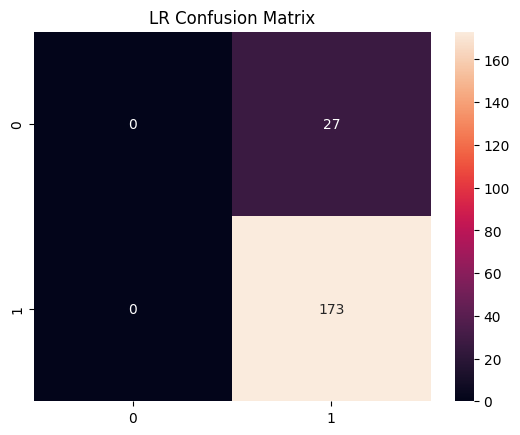

In [9]:
# Evaluate the models
print("Logistic Regression Model Report:")
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("LR Confusion Matrix")
plt.show()

Random Forest Model Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.85       200
   macro avg       0.43      0.49      0.46       200
weighted avg       0.75      0.85      0.80       200



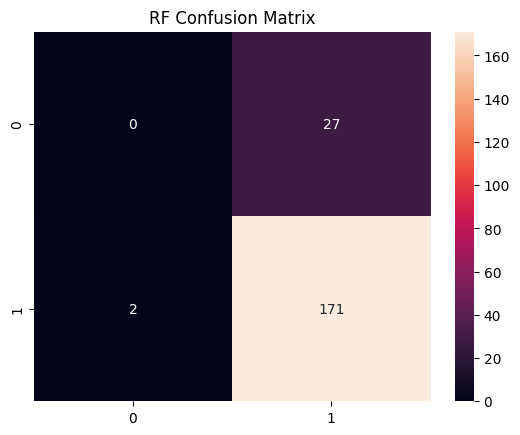

In [10]:
# Evaluate the Random Forest model:
print("Random Forest Model Report:")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("RF Confusion Matrix")
plt.show()

In [11]:
# Logistic Regression metrics
print("🔹 Logistic Regression Metrics:\n")
print(classification_report(y_test, y_pred_lr))

# Random Forest metrics
print("🔹 Random Forest Metrics:\n")
print(classification_report(y_test, y_pred_rf))


🔹 Logistic Regression Metrics:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200

🔹 Random Forest Metrics:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.85       200
   macro avg       0.43      0.49      0.46       200
weighted avg       0.75      0.85      0.80       200



C:\Users\jayja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jayja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jayja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [15]:
import joblib
import os

# ✅ Correct relative path from notebook folder
os.makedirs('../model', exist_ok=True)
joblib.dump(rf_model, '../model/student_pass_predictor.pkl')

['../model/student_pass_predictor.pkl']